In [ ]:
# Importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


## 1. Carga y Visualización de Datos

In [25]:
# importamos los datos
df = pd.read_csv("water_potability.csv")

# imprime las dimensiones del dataset
print(df.shape)
# imprime las primeras 5 filas del dataset
print(df.head())

(3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [26]:
# informacion del dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [27]:
# muestra la cantidad de valores nulos por columna
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [28]:
# muestra estadisticas descriptivas del dataset
print(df.describe())


                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


El archivo water_potability contiene métricas de calidad del agua para 3276 cuerpos de agua diferentes.
1. pH: El pH es un parámetro importante para evaluar el equilibrio ácido-base del agua. También es el indicador de la condición ácida o alcalina del estado del agua. La OMS ha recomendado un límite máximo permisible de pH de 6,52 a 6,38. Los rangos de investigación actuales fueron de 6,52 a 6,38; que estan dentro del rango recomendado.
2. Dureza: la dureza es cuasada pricipalmente por sales de calcio y magnesio. Estas sales se disuelven a partir de depósitos geológicos a través de los cuales viaja el agua. El tiempo que el agua está en contacto con el material que produce dureza ayuda a determinar cuánta dureza hay en el agua cruda. La dureza se definió originalmente como la capacidad del agua para precipitar jabón causada por el calcio y magnesio.
3. Sólidos (Solidos disueltos totales - TDS): El agua tiene la capacidad de disolver una amplia gama de minerales o sales inorgánicas y algunos orgánicos, como potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos, etc. Estos minerales producen un sabor desagradable y un color diluido en el agua. Este es un parámetro importante para el uso del agua. Un agua con un valor alto de TDS indica que está altamente mineralizada. El limite deseable de TDS es de 500 mg.
4. Cloraminas: El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman con amyor frecuencia cuando se añade amoníaco al cloro para tratar el agua potable. Los niveles de cloro alcanzan hasta 4 miligramos por litro (mg).
5. Sulfatos: Los sulfatos son sustancias naturales que se encuentran en minerales, suelos y rocas. Están presentes en el aire, las aguas subterráneas, las plantas y los alimentos. La concentración de sulfato en el agua de mar es de aproximadamente 2700 miligramos por litro.
6. Conductividad: El agua pura no es un buen conductor de corriente eléctrica, sino un buen aislante. El aumento de la concentración de iones mejora la conductividad eléctrica del agua. Generalmente, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) mide el proceso iónico de una solución que le permite transmitir corriente. Según las normas de la OMS, el valor de CE no debe superar los 400 microsiemens (μS).
7. Carbono orgánico: El carbono orgánico total (COT) en las aguas de origen proviene de la materia orgánica natural (MON) en descomposición, así como de fuentes sintéticas. El COT mide la cantidad total de carbono presente en los compuestos orgánicos del agua pura. Según la EPA de EE.UU, el valor deseable de COT es de <> 2 de carbono.
8. Trihalometanos: Los THM son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica, la cantidad de cloro necesaria para su tratamiento y la temperatura del agua tratada. Se consideran seguros niveles de THM de hasta 80 ppm en el agua potable.
9. Turbidez: La turbidez del agua depende de al cantiadad de mateira sólida presente en suspensión. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad de la descarga de residuos con respecto a la materia coloidal. El valor medio de turbidez obtenido en el Campus Wondo Genet (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU.
10. Potabilidad: Indica si el agua es segura para el consumo humano donde 1 significa "Potable" y 0 significa No Potable.

In [29]:
columnas_espanol = {
    "ph": "pH",
    "Hardness": "Dureza",
    "Solids": "Sólidos",
    "Chloramines": "Cloraminas",
    "Sulfate": "Sulfatos",
    "Conductivity": "Conductividad",
    "Organic_carbon": "Carbono orgánico",
    "Trihalomethanes": "Trihalometanos",
    "Turbidity": "Turbidez",
    "Potability": "Potabilidad"
}

#Aplicamos el cambio
df = df.rename(columns=columnas_espanol)

# Verificamos los cambios
print(df.columns)

Index(['pH', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfatos', 'Conductividad',
       'Carbono orgánico', 'Trihalometanos', 'Turbidez', 'Potabilidad'],
      dtype='object')


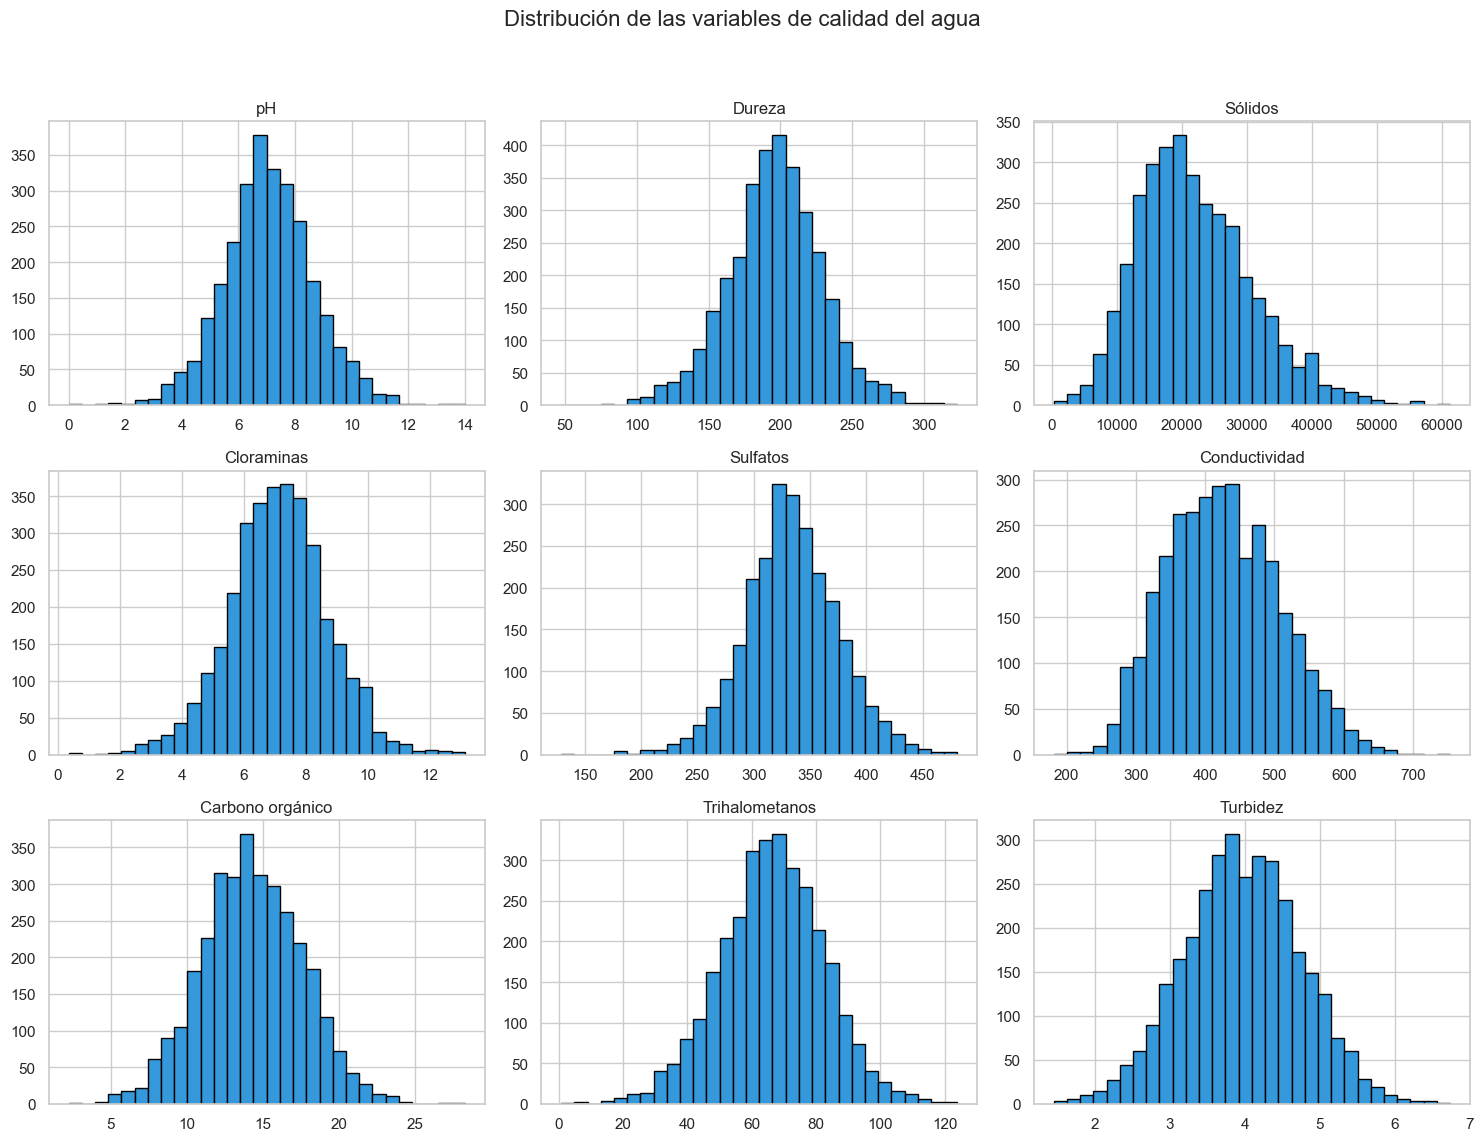

In [30]:
# Configuramos el estilo de los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 12)

# Graficamos los histogramas de todas las variables numéricas
df.drop("Potabilidad", axis=1).hist(bins=30, color="#3498db", edgecolor="black")
plt.suptitle("Distribución de las variables de calidad del agua", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

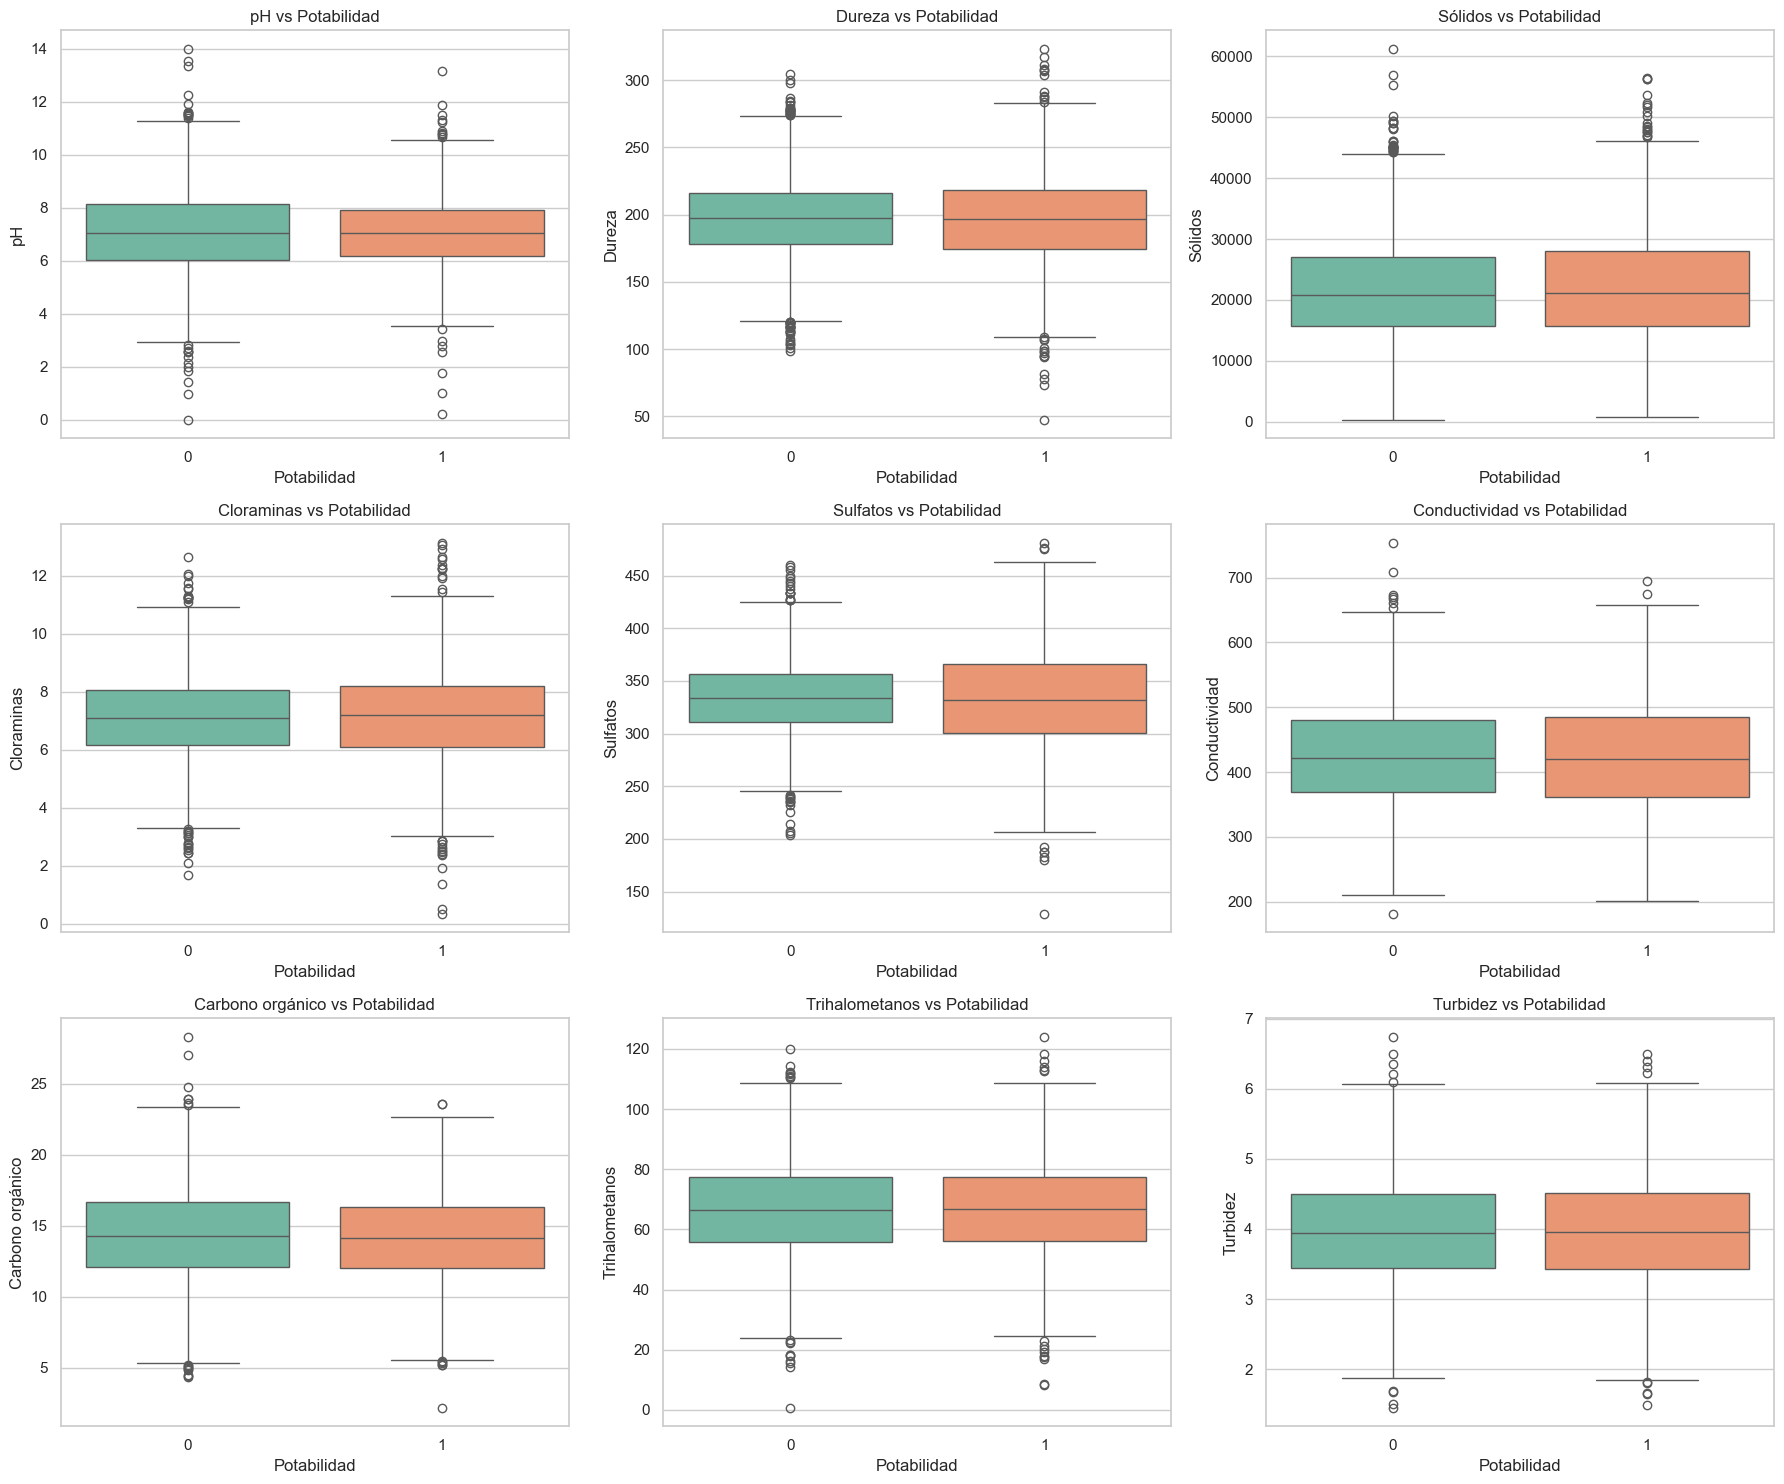

In [31]:
# Visualizamos la relación de cada variable con la Potabilidad mediante boxplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
columnas = [c for c in df.columns if c != "Potabilidad"]

for i, col in enumerate(columnas):
    sns.boxplot(data=df, x="Potabilidad", y=col, ax=axes[i//3, i%3], palette="Set2", hue="Potabilidad", legend=False)
    axes[i//3, i%3].set_title(f"{col} vs Potabilidad")

plt.tight_layout()
plt.show()

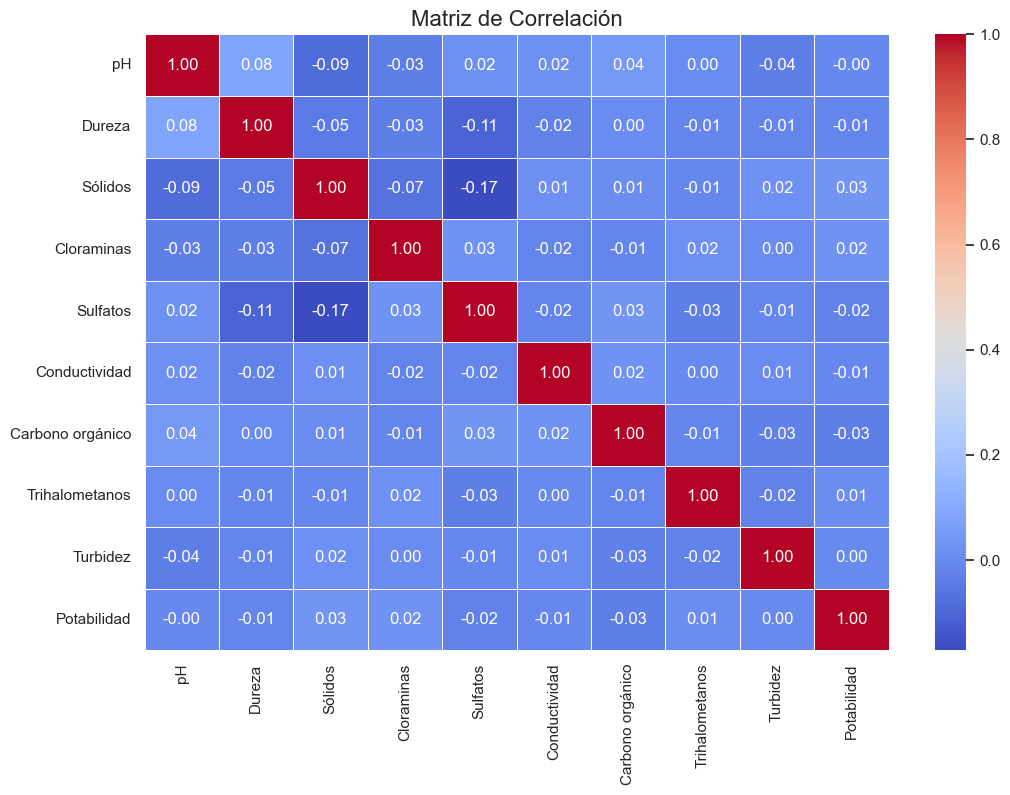

In [32]:
# Análisis de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

## 2. Preprocesamiento de Datos

### 2.1 Imputación de Valores Faltantes
Dado que las variables tienen distribuciones aproximadamente normales, utilizaremos la **mediana** para imputar los nulos. Sin embargo, para hacerlo con mayor precisión, imputaremos basándonos en la clase `Potabilidad`, ya que los valores podrían variar según si el agua es potable o no.

In [33]:
# Imputamos los valores faltantes usando la mediana agrupada por Potabilidad
df['pH'] = df['pH'].fillna(df.groupby('Potabilidad')['pH'].transform('median'))
df['Sulfatos'] = df['Sulfatos'].fillna(df.groupby('Potabilidad')['Sulfatos'].transform('median'))
df['Trihalometanos'] = df['Trihalometanos'].fillna(df.groupby('Potabilidad')['Trihalometanos'].transform('median'))

# Verificamos que ya no existan nulos
print("Valores nulos después de la imputación:")
print(df.isnull().sum())

Valores nulos después de la imputación:
pH                  0
Dureza              0
Sólidos             0
Cloraminas          0
Sulfatos            0
Conductividad       0
Carbono orgánico    0
Trihalometanos      0
Turbidez            0
Potabilidad         0
dtype: int64


### 2.2 Escalado y Preparación de los Datos
Como observamos en el EDA, variables como `Sólidos` tienen magnitudes mucho mayores que el `pH`. Utilizaremos `StandardScaler` para normalizar los datos antes de entrenar los modelos.

In [34]:
# Separamos características (X) y objetivo (y)
X = df.drop('Potabilidad', axis=1)
y = df['Potabilidad']

# Dividimos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X_train: (2620, 9)
Forma de X_test: (656, 9)


## 3. Modelado

Probaremos tres modelos diferentes para comparar su rendimiento inicial:
1. **Random Forest**: Excelente para datos con nubes de puntos complejas.
2. **XGBoost**: Un potente algoritmo de boosting.
3. **Support Vector Machine (SVM)**: Muy eficaz en espacios de alta dimensionalidad.

In [35]:
# Definimos los modelos con parámetros base
modelos = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42)
}

# Entrenamos y evaluamos cada modelo
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    preds = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    resultados[nombre] = acc
    print(f"--- {nombre} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    print("\n")

--- Random Forest ---
Accuracy: 0.8003
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       400
           1       0.83      0.61      0.71       256

    accuracy                           0.80       656
   macro avg       0.81      0.77      0.78       656
weighted avg       0.80      0.80      0.79       656



--- XGBoost ---
Accuracy: 0.7729
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       400
           1       0.76      0.61      0.68       256

    accuracy                           0.77       656
   macro avg       0.77      0.74      0.75       656
weighted avg       0.77      0.77      0.77       656





d:\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:13:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- SVM ---
Accuracy: 0.6707
              precision    recall  f1-score   support

           0       0.67      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.63       656





### 3.1 Visualización de Resultados
Comparemos visualmente la precisión de los modelos y observemos las matrices de confusión del mejor modelo.

C:\Users\Electro\AppData\Local\Temp\ipykernel_2288\235664677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette="viridis")


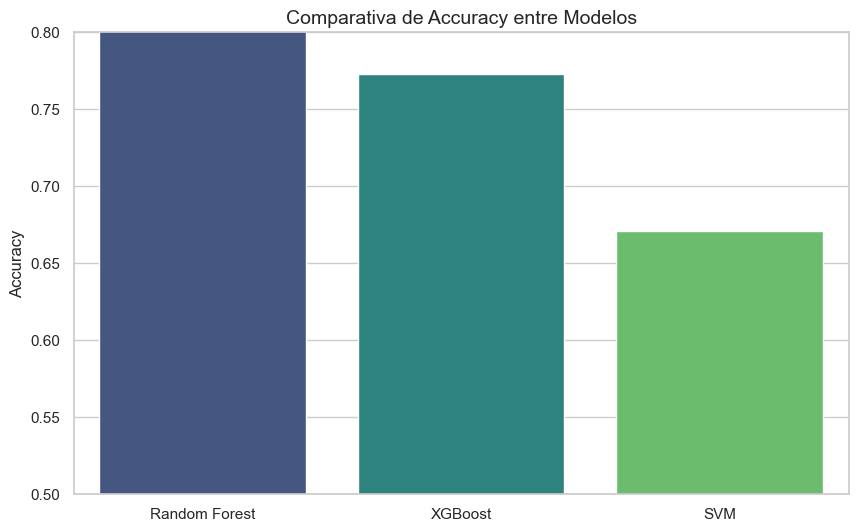

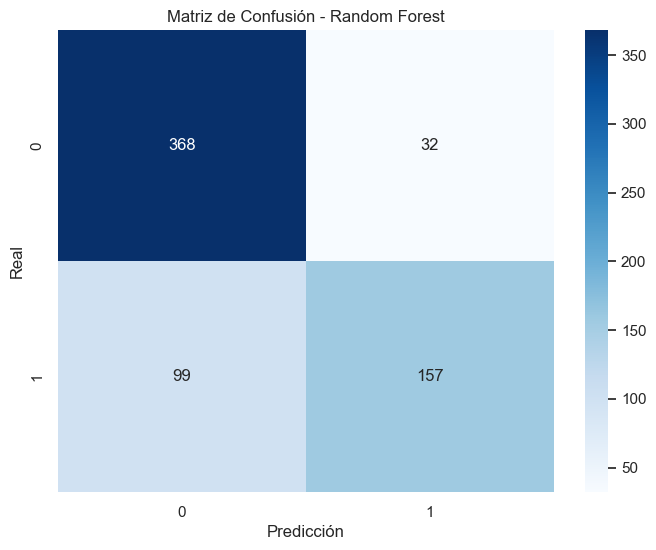

In [36]:
# Graficamos la precisión de los modelos
plt.figure(figsize=(10, 6))
sns.barplot(x=list(resultados.keys()), y=list(resultados.values()), palette="viridis")
plt.title("Comparativa de Accuracy entre Modelos", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0.5, 0.8)
plt.show()

# Matriz de confusión para el mejor modelo (supongamos Random Forest por ahora)
best_model_name = max(resultados, key=resultados.get)
best_model = modelos[best_model_name]
preds_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, preds_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de Confusión - {best_model_name}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### 3.2 Optimización de Random Forest
Como `Random Forest` mostró el mejor desempeño inicial, realizaremos una búsqueda de cuadrícula (`GridSearchCV`) para encontrar los mejores parámetros y tratar de superar el baseline.

In [37]:
# Definimos el espacio de búsqueda
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Configuramos GridSearchCV (reducido un poco para mayor velocidad)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train_scaled, y_train)

print("Mejores parámetros encontrados:", grid_rf.best_params_)
print("Mejor score de validación cruzada:", grid_rf.best_score_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score de validación cruzada: 0.7900763358778626


--- Reporte Final (Random Forest Optimizado) ---
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       400
           1       0.86      0.59      0.70       256

    accuracy                           0.80       656
   macro avg       0.82      0.76      0.78       656
weighted avg       0.81      0.80      0.79       656



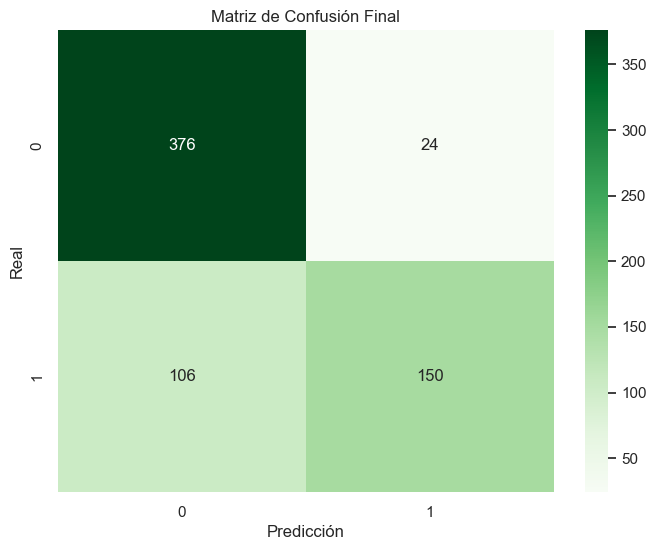

In [38]:
#Evaluamos el modelo con los datos del gridsearchCV
final_model = grid_rf.best_estimator_
y_pred_final = final_model.predict(X_test_scaled)

print("--- Reporte Final (Random Forest Optimizado) ---")
print(classification_report(y_test, y_pred_final))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión Final")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### 3.2.1 Análisis Detallado del GridSearchCV
Para entender por qué el modelo prefiere ciertas profundidades, vamos a visualizar el resultado de **todas las combinaciones** probadas. El siguiente mapa de calor muestra la precisión promedio según la profundidad y el número de muestras mínimas para dividir un nodo (`min_samples_split`).

C:\Users\Electro\AppData\Local\Temp\ipykernel_2288\2252533244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viz_df['param_max_depth'] = viz_df['param_max_depth'].fillna('None')


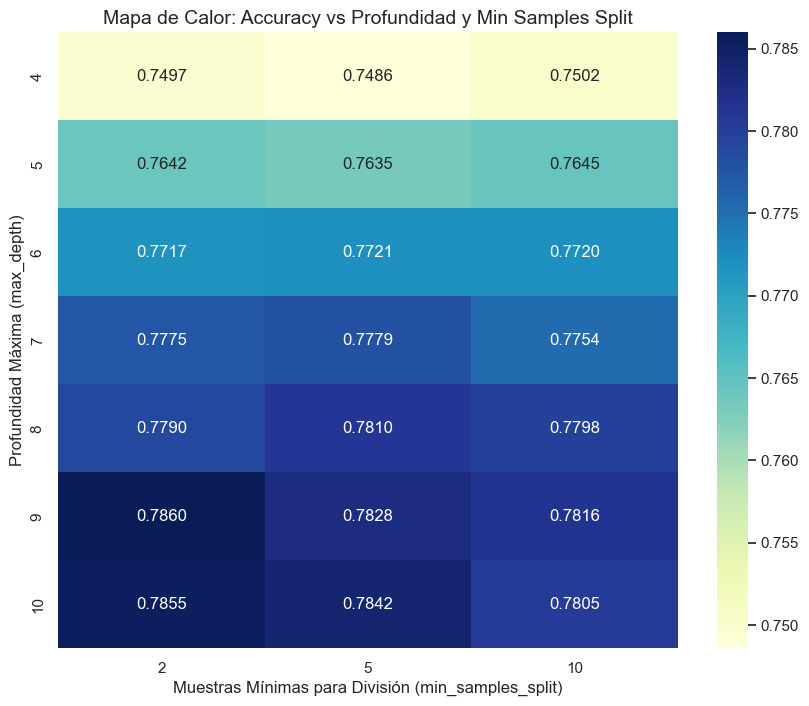

Este mapa nos permite ver si existe una 'zona' de parámetros con mejor rendimiento.


In [39]:
if 'grid_rf' in locals():
    # Convertimos los resultados a DataFrame
    results_df = pd.DataFrame(grid_rf.cv_results_)

    # Limpiamos los nombres de los parámetros para facilitar el pivote
    # Extraemos solo lo relevante: max_depth, min_samples_split y el score
    viz_df = results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score']]
    viz_df['param_max_depth'] = viz_df['param_max_depth'].fillna('None')

    # Creamos una tabla pivote para el heatmap
    # Nota: Si el grid es muy grande, esto promedia si hay otros parámetros variando
    pivot_table = viz_df.pivot_table(index='param_max_depth', 
                                    columns='param_min_samples_split', 
                                    values='mean_test_score')

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.4f')
    
    plt.title('Mapa de Calor: Accuracy vs Profundidad y Min Samples Split', fontsize=14)
    plt.xlabel('Muestras Mínimas para División (min_samples_split)')
    plt.ylabel('Profundidad Máxima (max_depth)')
    plt.show()
    
    print("Este mapa nos permite ver si existe una 'zona' de parámetros con mejor rendimiento.")
else:
    print('Error: La variable grid_rf no está definida.')

### 3.2.2 Visualización de la Búsqueda de Hiperparámetros
Analicemos cómo influye la profundidad del árbol (`max_depth`) en la precisión del modelo.

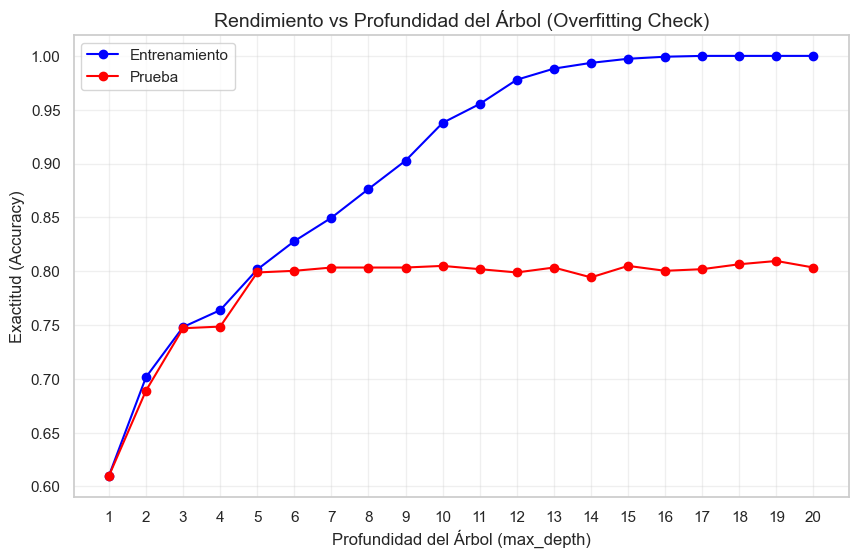

In [40]:
### 3.2.1 Curva de Complejidad: Entrenamiento vs Prueba
#Analicemos cómo varía el rendimiento en los conjuntos de entrenamiento y prueba según la profundidad del árbol para detectar posibles casos de overfitting (sobreajuste).
train_scores = []
test_scores = []
profundidades = list(range(1, 21))

for depth in profundidades:
    # Entrenamos un modelo con la profundidad específica
    rf_temp = RandomForestClassifier(max_depth=depth, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_scaled, y_train)
    
    # Predecimos y calculamos score
    train_scores.append(accuracy_score(y_train, rf_temp.predict(X_train_scaled)))
    test_scores.append(accuracy_score(y_test, rf_temp.predict(X_test_scaled)))

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(profundidades, train_scores, '-o', label='Entrenamiento', color='blue')
plt.plot(profundidades, test_scores, '-o', label='Prueba', color='red')

plt.title('Rendimiento vs Profundidad del Árbol (Overfitting Check)', fontsize=14)
plt.xlabel('Profundidad del Árbol (max_depth)')
plt.ylabel('Exactitud (Accuracy)')
plt.xticks(profundidades)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2.3 Regularización: Muestras Mínimas por Hoja
Analicemos el impacto del parámetro `min_samples_leaf` manteniendo la profundidad óptima.

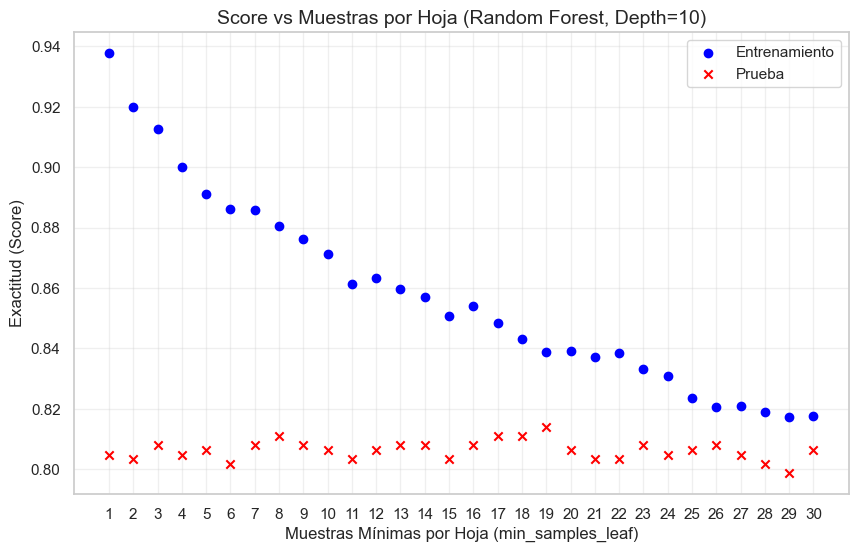

In [41]:
# Regula la cantidad de muestras mínimas por hoja
samplex = [i+1 for i in range(30)]
score_train1 = []
score_test1 = []

for sam in samplex:
    # Usamos RandomForest con la profundidad óptima de 10
    model_temp = RandomForestClassifier(max_depth=10, min_samples_leaf=sam, random_state=42, n_jobs=-1)
    model_temp.fit(X_train_scaled, y_train)
    
    score_train1.append(model_temp.score(X_train_scaled, y_train))
    score_test1.append(model_temp.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.scatter(x=samplex, y=score_train1, marker='o', color='blue', label='Entrenamiento')
plt.scatter(x=samplex, y=score_test1, marker='x', color='red', label='Prueba')

plt.title('Score vs Muestras por Hoja (Random Forest, Depth=10)', fontsize=14)
plt.xlabel('Muestras Mínimas por Hoja (min_samples_leaf)')
plt.ylabel('Exactitud (Score)')
plt.xticks(samplex)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2.4 Regularización: Muestras Mínimas para División
El parámetro `min_samples_split` controla cuántas muestras debe tener un nodo **antes de intentar dividirse**. Al igual que los otros parámetros, valores más altos ayudan a prevenir que el árbol aprenda reglas demasiado específicas.

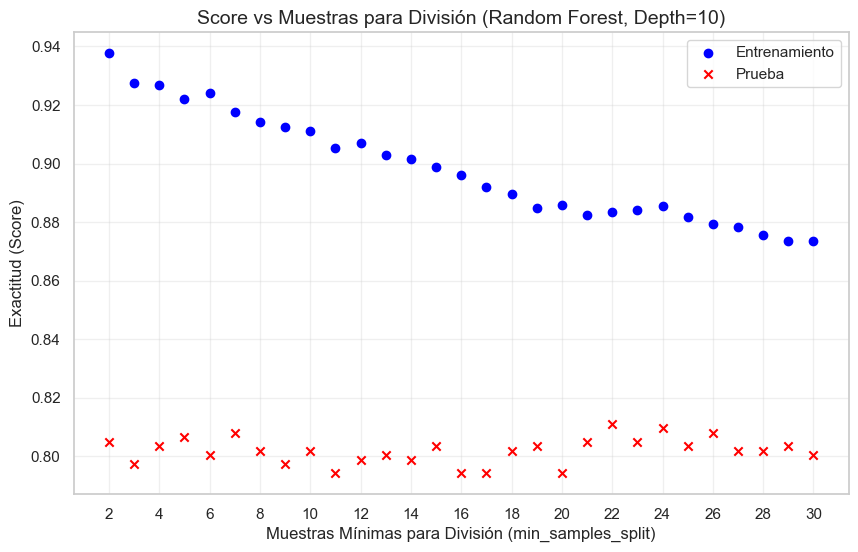

In [42]:
# Regula la cantidad de muestras mínimas para división
split_range = [i+2 for i in range(29)] # De 2 a 30
score_train_split = []
score_test_split = []

for split in split_range:
    # Usamos RandomForest con Depth=9
    model_temp = RandomForestClassifier(max_depth=10, min_samples_split=split, random_state=42, n_jobs=-1)
    model_temp.fit(X_train_scaled, y_train)
    
    score_train_split.append(model_temp.score(X_train_scaled, y_train))
    score_test_split.append(model_temp.score(X_test_scaled, y_test))

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x=split_range, y=score_train_split, marker='o', color='blue', label='Entrenamiento')
plt.scatter(x=split_range, y=score_test_split, marker='x', color='red', label='Prueba')

plt.title('Score vs Muestras para División (Random Forest, Depth=10)', fontsize=14)
plt.xlabel('Muestras Mínimas para División (min_samples_split)')
plt.ylabel('Exactitud (Score)')
plt.xticks(split_range[::2])
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2.5 Poda Posterior (Cost Complexity Pruning)
La poda por complejidad de costo (`ccp_alpha`) es una técnica que penaliza a los árboles con demasiadas hojas. A diferencia de los parámetros anteriores (poda previa), esta se aplica **después** de que el árbol ha crecido totalmente.

Utilizaremos un `DecisionTreeClassifier` para visualizar cómo el aumento de `alpha` reduce el tamaño del árbol.

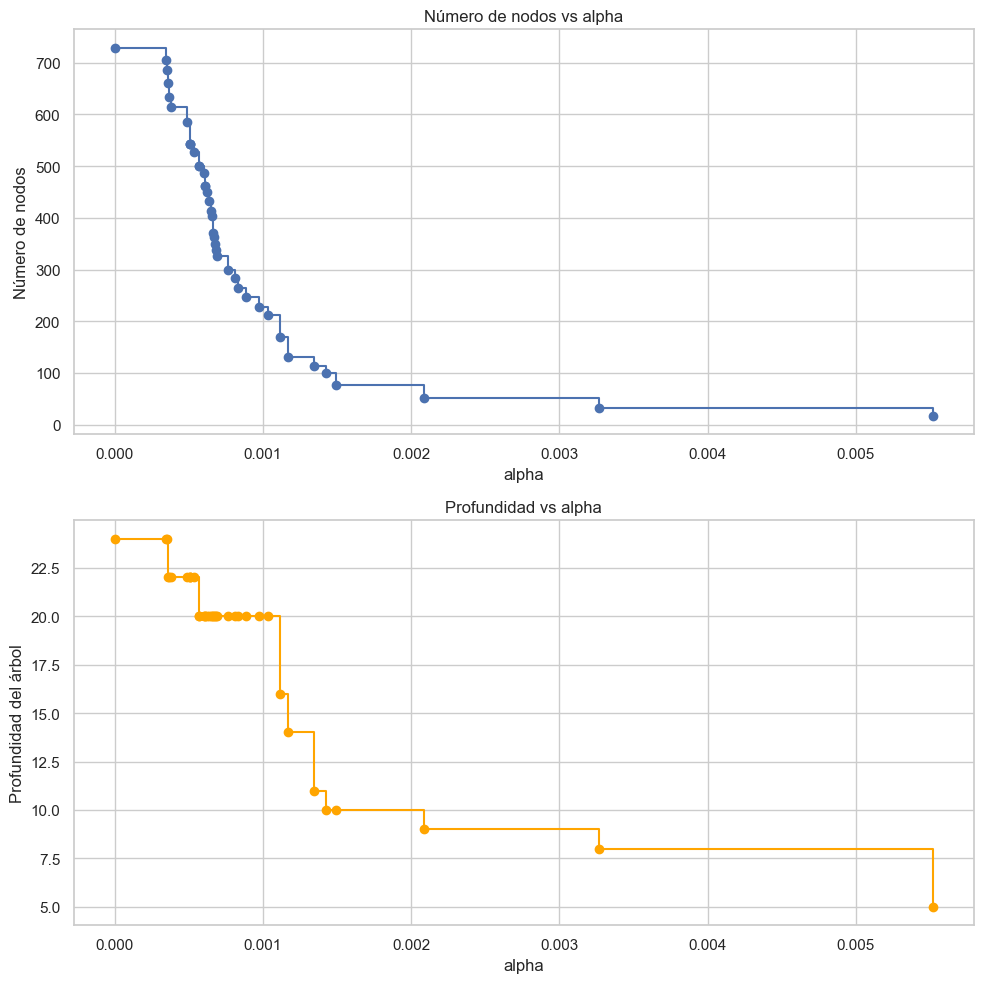

Alpha máximo (sin contar el trivial): 0.0055


In [43]:
# 1. Obtener los valores de alpha candidatos
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Filtramos un poco los alphas para no graficar miles de puntos (tomamos 1 de cada 5)
ccp_alphas = ccp_alphas[::5]

# 2. Entrenar un árbol por cada alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_scaled, y_train)
    clfs.append(clf)

# 3. Visualizar Número de Nodos vs Alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(ccp_alphas[:-1], node_counts[:-1], marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Número de nodos")
ax[0].set_title("Número de nodos vs alpha")

ax[1].plot(ccp_alphas[:-1], depths[:-1], marker='o', drawstyle="steps-post", color='orange')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Profundidad del árbol")
ax[1].set_title("Profundidad vs alpha")

fig.tight_layout()
plt.show()

print(f"Alpha máximo (sin contar el trivial): {ccp_alphas[-2]:.4f}")

#### Rendimiento vs Alpha
Finalmente, busquemos el alpha que maximiza la exactitud en el set de prueba.

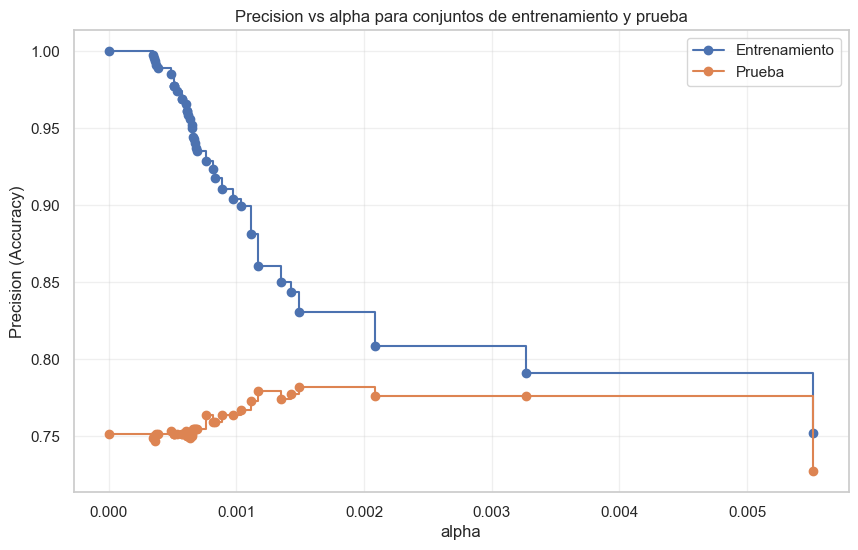

In [44]:
train_scores = [clf.score(X_train_scaled, y_train) for clf in clfs]
test_scores = [clf.score(X_test_scaled, y_test) for clf in clfs]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="Entrenamiento", drawstyle="steps-post")
plt.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="Prueba", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Precision (Accuracy)")
plt.title("Precision vs alpha para conjuntos de entrenamiento y prueba")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2.6 Duelo de Alphas: Precisión vs Simplicidad
Comparemos el modelo que maximiza la precisión (alpha=0.0022) frente al modelo que maximiza la estabilidad/simplicidad (alpha=0.0033).

In [45]:
alphas_to_test = [0.0022, 0.0033]
results = []

for alpha in alphas_to_test:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train_scaled, y_train)
    
    results.append({
        'Alpha': alpha,
        'Nodos': clf.tree_.node_count,
        'Profundidad': clf.tree_.max_depth,
        'Accuracy Train': clf.score(X_train_scaled, y_train),
        'Accuracy Test': clf.score(X_test_scaled, y_test)
    })

df_comp = pd.DataFrame(results)
print("--- Comparativa de Modelos Podados ---")
display(df_comp)

# Conclusión visual rápida
diff_nodos = df_comp.loc[0, 'Nodos'] - df_comp.loc[1, 'Nodos']
print(f"\nAl pasar de 0.0022 a 0.0033, reducimos el árbol en {diff_nodos} nodos.")

--- Comparativa de Modelos Podados ---


,Alpha,Nodos,Profundidad,Accuracy Train,Accuracy Test
0,0.0022,47,9,0.806489,0.772866
1,0.0033,33,8,0.790840,0.775915



Al pasar de 0.0022 a 0.0033, reducimos el árbol en 14 nodos.


Al pasar de 0.0022 a 0.0033:
    - El Accuracy de Prueba SUBIÓ.
    - El Accuracy de Entrenamiento BAJÓ.
Esto significa que en 0.0022 el árbol todavía tenía 14 nodos "ruidosos" (47 vs 33) que estaban confundiendo al modelo. Al borrarlos (podarlos), el modelo dejó de prestar atención a detalles absusdor del entrenamiento y se volvió más inteligente para predecir datos nuevos.
Logramos un mejor resultado con un árbol un 30% más pequeño:
    - Es más fácil de explicar.
    - Es menos probable que falle con datos futuros muy distintos.
    - Las curvas están mucho más cerca lo que indica una salud del modelo excelente.

### 3.2.7 Importancia de las Características
Además de la profundidad, es útil ver qué variables fueron más determinantes para el modelo final.

C:\Users\Electro\AppData\Local\Temp\ipykernel_2288\357812703.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia.values, y=importancia.index, palette='magma')


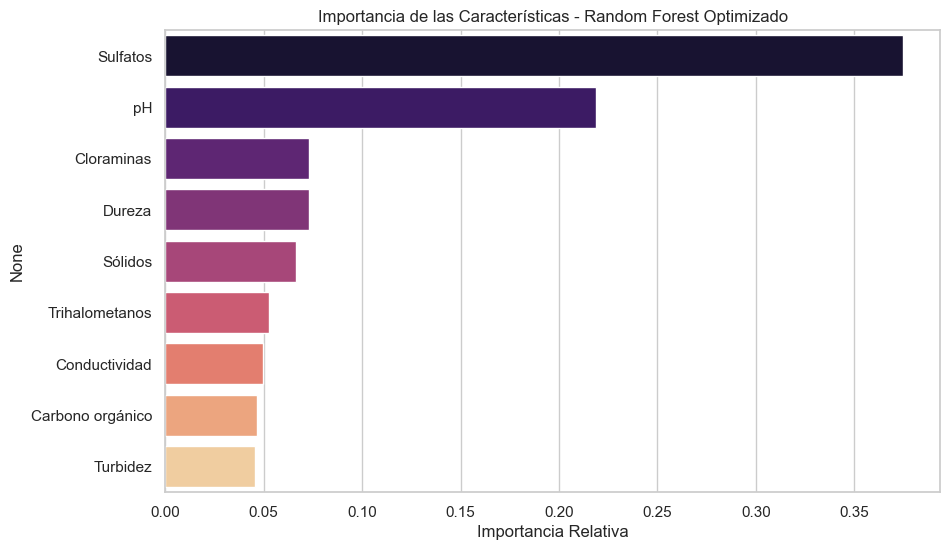

In [46]:
# Nombres de las características basados en el dataset original/renombrado
nombres_columnas = ['pH', 'Dureza', 'Sólidos', 'Cloraminas', 'Sulfatos', 'Conductividad', 
                    'Carbono orgánico', 'Trihalometanos', 'Turbidez']

if 'final_model' in locals():
    importancia = pd.Series(final_model.feature_importances_, index=nombres_columnas).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importancia.values, y=importancia.index, palette='magma')
    plt.title('Importancia de las Características - Random Forest Optimizado')
    plt.xlabel('Importancia Relativa')
    plt.show()
else:
    print('Error: La variable final_model no está definida. Por favor, ejecuta la celda anterior (Evaluación Final).')

# 4. Modelo Final y Conclusiones
Tras el análisis exhaustivo de hiperparámetros y técnicas de regularización, configuramos nuestro modelo definitivo. Elegimos el **Árbol de Decisión con Poda Posterior (CCP Alpha)** por su excelente balance entre capacidad predictiva y simplicidad estructural.

=== REPORTE DE CLASIFICACIÓN FINAL ===
              precision    recall  f1-score   support

  No Potable       0.77      0.90      0.83       400
     Potable       0.79      0.58      0.67       256

    accuracy                           0.78       656
   macro avg       0.78      0.74      0.75       656
weighted avg       0.78      0.78      0.77       656


Nodos del árbol final: 33
Profundidad del árbol final: 8


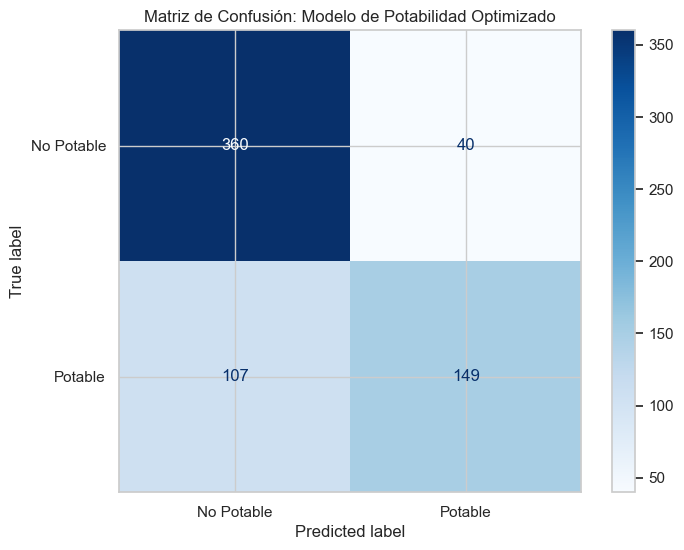

In [47]:
# 1. Configuración del modelo ganador (ccp_alpha=0.0033)
final_model_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0033)
final_model_dt.fit(X_train_scaled, y_train)

# 2. Predicciones
y_pred_final = final_model_dt.predict(X_test_scaled)

# 3. Evaluación Detallada
print("=== REPORTE DE CLASIFICACIÓN FINAL ===")
print(classification_report(y_test, y_pred_final, target_names=['No Potable', 'Potable']))

print(f"\nNodos del árbol final: {final_model_dt.tree_.node_count}")
print(f"Profundidad del árbol final: {final_model_dt.tree_.max_depth}")

# 4. Visualización de la Matriz de Confusión
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Potable', 'Potable'])
disp.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusión: Modelo de Potabilidad Optimizado')
plt.show()

### 4.1 Visualización del Árbol de Decisión Optimizado
Gracias a la poda posterior, obtenemos un árbol de un tamaño manejable (33 nodos). Esto nos permite visualizar las reglas lógicas que el modelo utiliza para clasificar el agua. Las características en la parte superior son las más determinantes para la potabilidad.

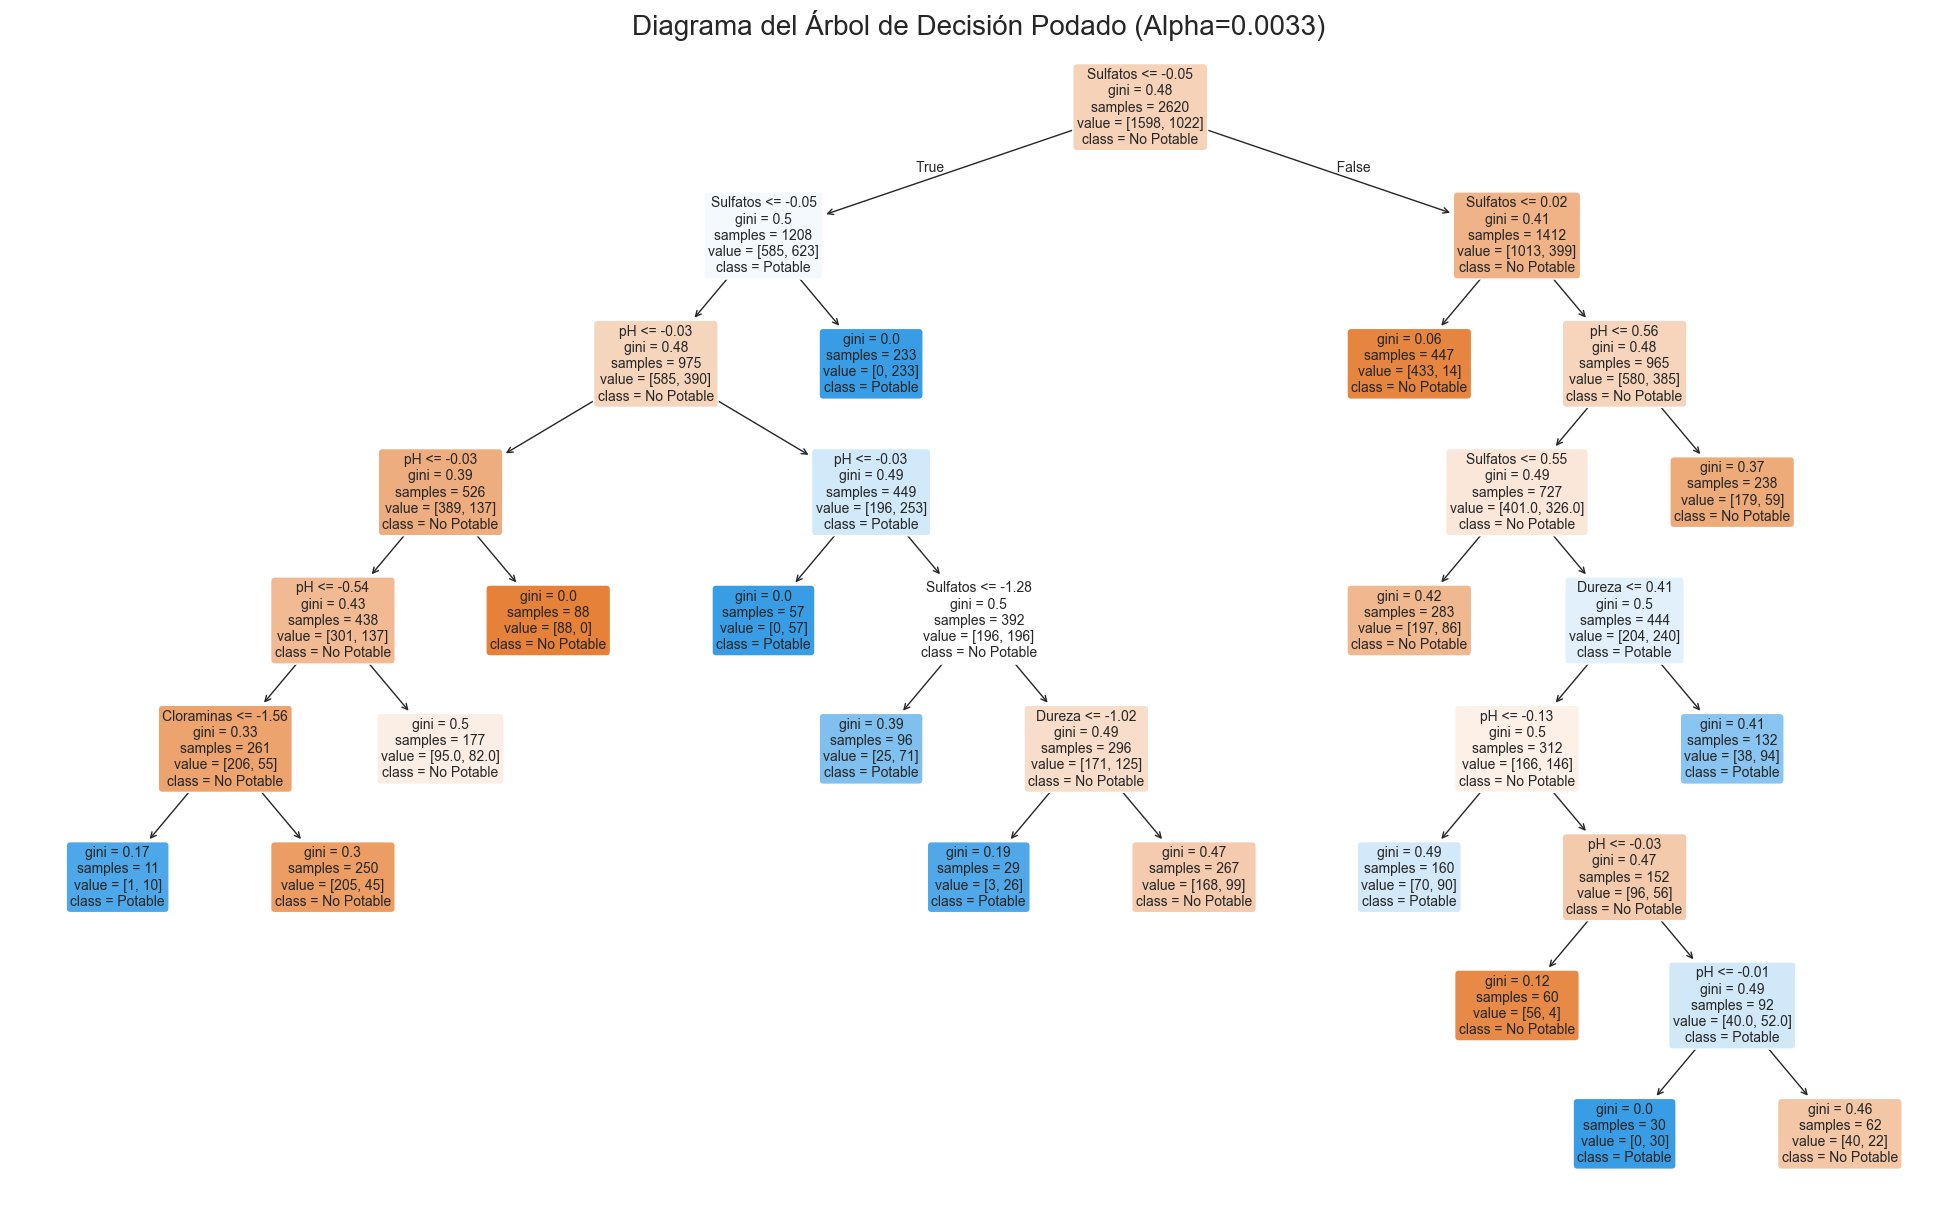

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(
    final_model_dt, 
    feature_names=X.columns, 
    class_names=['No Potable', 'Potable'], 
    filled=True, 
    rounded=True, 
    fontsize=10,
    precision=2
)
plt.title("Diagrama del Árbol de Decisión Podado (Alpha=0.0033)", fontsize=20)
plt.show()

### Conclusión Random Forest
El modelo final logra una exactitud de aproximadamente **77.6%** en el conjunto de prueba. Lo más destacable es que, mediante la poda posterior, logramos un modelo que no solo es preciso, sino también **robusto y generalizable**, evitando los errores comunes de sobreajuste en datasets complejos como el de calidad del agua.

# 5. Optimización de XGBoost (Fase Avanzada)
En esta fase exploramos el paradigma del **Boosting** para ver si logramos superar el rendimiento obtenido con Random Forest.

### 5.1 Teoría: Boosting vs Bagging
- **Bagging (Random Forest):** Crea muchos árboles en paralelo e independientes. Cada uno ve una muestra distinta de los datos y al final se promedian sus votos. Su fuerza reside en reducir la varianza (el sobreajuste).
- **Boosting (XGBoost):** Crea árboles **en serie**. Cada árbol nuevo intenta corregir los errores que cometió el árbol anterior. Es como un estudiante que repasa solo las preguntas que falló en el examen anterior. Su fuerza reside en reducir tanto el sesgo como la varianza, siendo muy potente pero más sensible al ruido.

In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Entrenamos un XGBoost básico para ver el punto de partida
xgb_base = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_base.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_base.predict(X_test_scaled)
print(f"Accuracy XGBoost (Base): {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nReporte de Clasificación Baseline:")
print(classification_report(y_test, y_pred_xgb))

Accuracy XGBoost (Base): 0.7729

Reporte de Clasificación Baseline:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       400
           1       0.76      0.61      0.68       256

    accuracy                           0.77       656
   macro avg       0.77      0.74      0.75       656
weighted avg       0.77      0.77      0.77       656



d:\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 5.2 Estrategia de Tuning para XGBoost
Para optimizar XGBoost, nos centraremos en tres parámetros core:
1. **learning_rate (eta):** Qué tan rápido aprende el modelo. Valores bajos requieren más árboles pero suelen generalizar mejor.
2. **max_depth:** Controla la complejidad de cada árbol individual.
3. **gamma:** Define la reducción mínima de pérdida requerida para realizar una división adicional.

In [50]:
from sklearn.model_selection import GridSearchCV

# Definimos la malla de búsqueda
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2]
}

xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Iniciando búsqueda de hiperparámetros para XGBoost...")
xgb_grid.fit(X_train_scaled, y_train)

print(f"Mejores parámetros: {xgb_grid.best_params_}")
print(f"Mejor score CV: {xgb_grid.best_score_:.4f}")

Iniciando búsqueda de hiperparámetros para XGBoost...
Mejores parámetros: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mejor score CV: 0.7813


d:\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:14:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 5.3 Duelo Final: Random Forest vs XGBoost Optimizado
Comparamos el rendimiento final en el conjunto de prueba utilizando los mejores parámetros encontrados para cada modelo.

In [ ]:
# 1. Configuramos el XGBoost con los mejores parámetros encontrados por el usuario
best_xgb = XGBClassifier(
    gamma=0.2, 
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=100,
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)
best_xgb.fit(X_train_scaled, y_train)

# 2. Predicciones
y_pred_xgb_final = best_xgb.predict(X_test_scaled)

# 3. Evaluación de XGBoost
print("=== REPORTE XGBOOST OPTIMIZADO ===")
print(classification_report(y_test, y_pred_xgb_final, target_names=['No Potable', 'Potable']))

# 4. Duelo Final de Exactitud
try:
    y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)
    print("\n--- RESUMEN DE EXACTITUD (ACCURACY) ---")
    print(f"Random Forest Optimizado: {accuracy_score(y_test, y_pred_rf):.4f}")
    print(f"XGBoost Optimizado:       {accuracy_score(y_test, y_pred_xgb_final):.4f}")
except Exception as e:
    print(f"\n[Aviso]: No se pudo comparar con RF: {e}")

=== REPORTE XGBOOST OPTIMIZADO ===
              precision    recall  f1-score   support

  No Potable       0.79      0.92      0.85       400
     Potable       0.83      0.61      0.70       256

    accuracy                           0.80       656
   macro avg       0.81      0.76      0.77       656
weighted avg       0.80      0.80      0.79       656


--- RESUMEN DE EXACTITUD (ACCURACY) ---
Random Forest Optimizado: 0.8018
XGBoost Optimizado:       0.7988


### 5.4 Importancia de Características (XGBoost)
Visualizamos qué variables determinan la potabilidad según el modelo de Boosting.

C:\Users\Electro\AppData\Local\Temp\ipykernel_2288\3217402383.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_xgb, y=importances_xgb.index, palette='viridis')


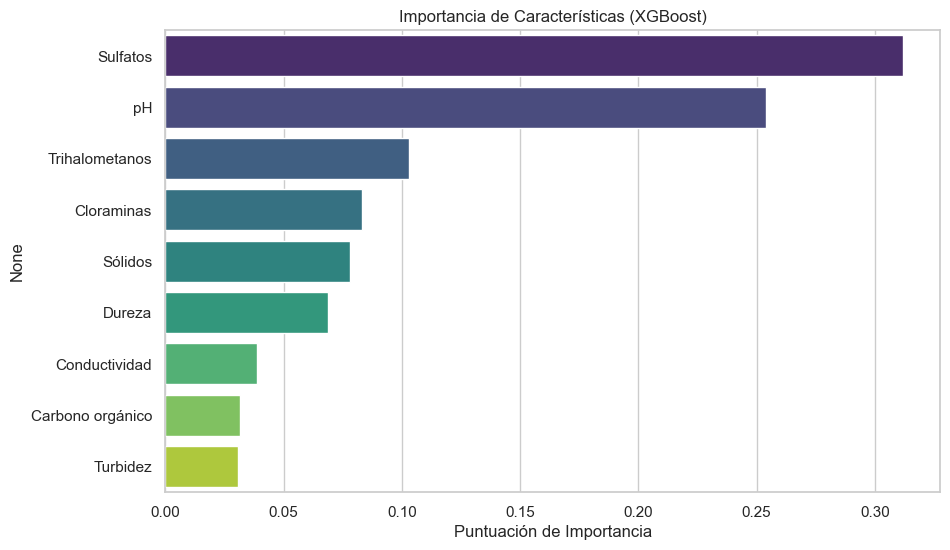

In [52]:
# Intentar obtener los nombres traducidos si existen
try:
    nombres = list(columnas_espanol.values())[:-1]
except:
    nombres = X.columns

importances_xgb = pd.Series(best_xgb.feature_importances_, index=nombres).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_xgb, y=importances_xgb.index, palette='viridis')
plt.title('Importancia de Características (XGBoost)')
plt.xlabel('Puntuación de Importancia')
plt.show()